# PROJECT ABOUT YEARS MOVING AVERAGE 
## Explore Weather Trends

### Gathering Data

We load the databases `results_city_data.csv` and `results_global_data.csv` in two different dataframes called `dF_city`and `df_data` respectively.

In [62]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [63]:
# We load the databases results_city_data.csv and results_global_data.csv in two different dataframes 
# called dF_cityand df_data respectively.

df_city = pd.read_csv('results_city_data.csv', sep=';')
df_global = pd.read_csv('results_global_data.csv', sep=',')

In [64]:
# Check changes
print(df_city.shape)
df_city.head()

(271, 4)


,year,city,country,avg_temp
0,1743,Barcelona,Spain,13.81
1,1744,Barcelona,Spain,16.98
2,1745,Barcelona,Spain,10.78
3,1746,Barcelona,Spain,NaN
4,1747,Barcelona,Spain,NaN


In [65]:
print(df_global.shape)
df_global.head()

(266, 2)


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### Assessing Data

We check if all `city`and `country`columns from `df_city` have the value Barcelona and Spain respectively.

In [66]:
df_city.city.value_counts(), df_city.country.value_counts()

(Barcelona    271
 Name: city, dtype: int64,
 Spain    271
 Name: country, dtype: int64)

> We will drop the `city`and `country`columns from `df_city` since they do not make any difference in information.

We check if the size of both dataframes are equal.

In [67]:
df_city.shape[0] - df_global.shape[0]

5

> We will drop the rows that don't match on year when we merge both dataframes.

We check datatypes

In [68]:
df_city.dtypes, df_global.dtypes

(year          int64
 city         object
 country      object
 avg_temp    float64
 dtype: object,
 year          int64
 avg_temp    float64
 dtype: object)

> We observe that te datatypes are correct.

**QUALITY ISSUES**
- Rename `year`and `avg_temp`of `df_city`to `year_bcn`and `avg_temp_bcn`, and also `year`and `avg_temp`of `df_global`to `year_global`and `avg_temp_global`.

**TIDINESS ISSUES**
- Drop the `city` and `country` columns from `df_city` since they do not make any difference in information.
- Merge `df_city`and `df_global`in a unique new dataframe.
- Remove one column of both columns related to year and rename it to year.

### Cleaning Data

Drop the `city` and `country` columns from `df_city` since they do not make any difference in information.

**Define** 

We will drop the city and country columns from df_city with drop function.

**Code**

In [69]:
# We will drop the city and country columns from df_city with drop function.
df_city = df_city.drop(['city', 'country'], axis=1)

**Test**

In [70]:
df_city.head()

,year,avg_temp
0,1743,13.81
1,1744,16.98
2,1745,10.78
3,1746,NaN
4,1747,NaN


-------------------------------------------------------------------------------------------------------------------------------

Rename `year`and `avg_temp`of `df_city`to `year_bcn`and `avg_temp_bcn`, and also `year`and `avg_temp`of `df_global`to `year_global`and `avg_temp_global`.

**Define**
We rename year and avg_temp of df_city to year_bcn and avg_temp_bcn, and also year and avg_temp of df_global to year_global and avg_temp_global with rename function.

**Code**

In [71]:
df_city = df_city.rename(columns={'year':'year_bcn', 'avg_temp':'avg_temp_bcn'})
df_global = df_global.rename(columns={'year':'year_global', 'avg_temp':'avg_temp_global'})

**Test**

In [72]:
df_city.info(), df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_bcn      271 non-null    int64  
 1   avg_temp_bcn  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_global      266 non-null    int64  
 1   avg_temp_global  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


(None, None)

-------------------------------------------------------------------------------------------------------------------------------

Join `df_city` and `df_global` in a unique dataframe.

**Define**

We join df_city and df_global in a unique dataframe with merge function and join left in a new dataframe called df.

**Code**

In [73]:
df = df_city.merge(df_global, left_on='year_bcn', right_on='year_global')

**Test**

In [74]:
df.head()

,year_bcn,avg_temp_bcn,year_global,avg_temp_global
0,1750,16.52,1750,8.72
1,1751,16.78,1751,7.98
2,1752,13.09,1752,5.78
3,1753,16.17,1753,8.39
4,1754,16.09,1754,8.47


Remove one column of both columns related to year and rename it to year.

**Define**

We remove the column year_global with drop function and we rename it to year with rename function.

**Code**

In [75]:
df_final = df.drop('year_global', axis=1)
df_final = df_final.rename(columns={'year_bcn' : 'year'})

**Test**

In [76]:
df_final.head()

,year,avg_temp_bcn,avg_temp_global
0,1750,16.52,8.72
1,1751,16.78,7.98
2,1752,13.09,5.78
3,1753,16.17,8.39
4,1754,16.09,8.47


In [115]:
size = df_final.shape[0]
#import builtins
#range = builtins.range
for i in range(size):
    df_final['5_year_MA_bcn'].iloc[i] = (df_final.avg_temp_bcn.iloc[i] + df_final.avg_temp_bcn.iloc[i-1] + df_final.avg_temp_bcn.iloc[i-2] + df_final.avg_temp_bcn.iloc[i-3] + df_final.avg_temp_bcn.iloc[i-4]) / 5
df_final['5_year_MA_bcn'].iloc[0:4] = 0  

C:\Users\Gabri\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [116]:
df_final.head(20)

,year,avg_temp_bcn,avg_temp_global,5_year_MA_bcn
0,1750,16.52,8.72,0.000
1,1751,16.78,7.98,0.000
2,1752,13.09,5.78,0.000
3,1753,16.17,8.39,0.000
4,1754,16.09,8.47,15.730
5,1755,15.80,8.36,15.586
6,1756,16.11,8.85,15.452
7,1757,15.88,9.02,16.010
8,1758,15.04,6.74,15.784
9,1759,16.19,7.99,15.804


## VISUALIZATION

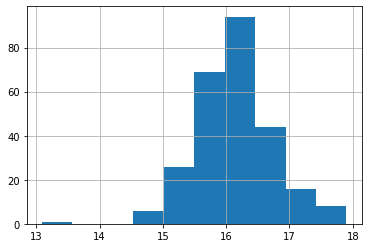

In [16]:
df_final.avg_temp_bcn.hist()

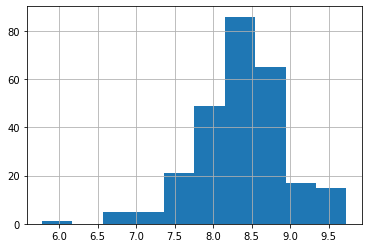

In [17]:
df_final.avg_temp_global.hist()

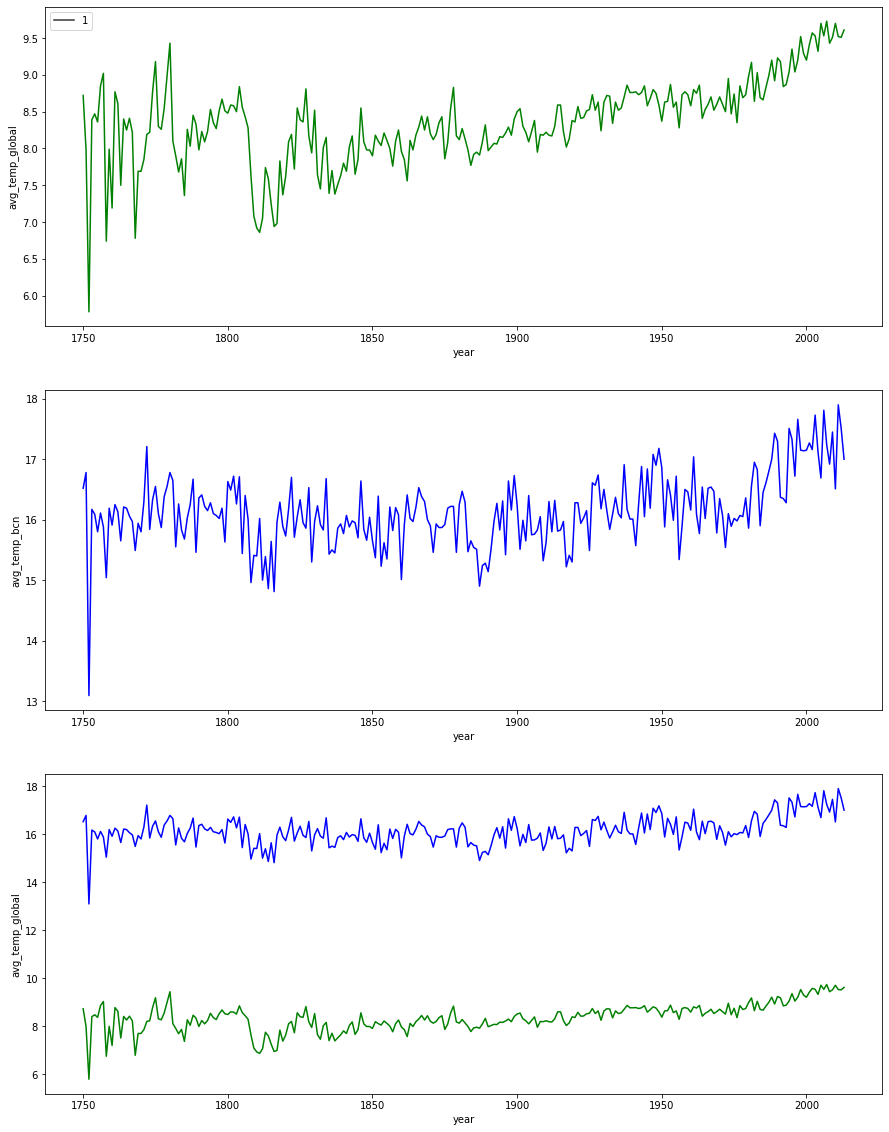

In [18]:
plt.figure(figsize=[15, 20])

plt.subplot(3, 1, 1)
sb.lineplot(data=df_final, x='year', y='avg_temp_global', color ='green', style=1, dashes=True)

plt.subplot(3, 1, 2)
sb.lineplot(data=df_final, x='year', y='avg_temp_bcn', color ='blue')

plt.subplot(3, 1, 3)
sb.lineplot(data=df_final, x='year', y='avg_temp_bcn', color ='blue')
sb.lineplot(data=df_final, x='year', y='avg_temp_global', color ='green')

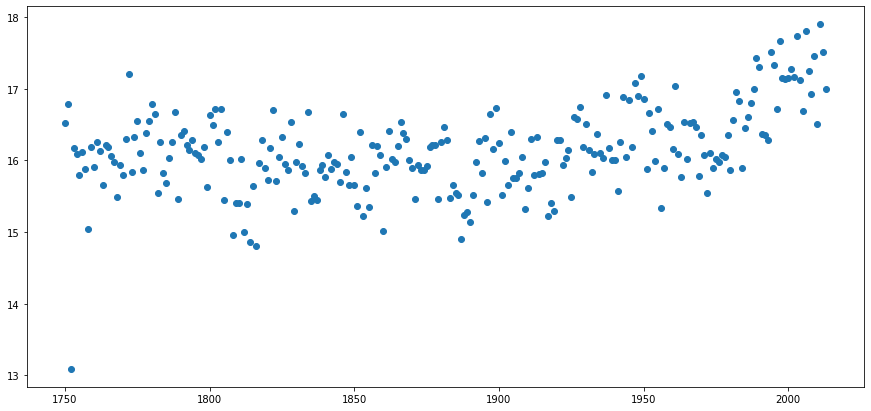

In [26]:
plt.figure(figsize=[15, 7])
plt.scatter(data=df_final, x='year', y='avg_temp_bcn')

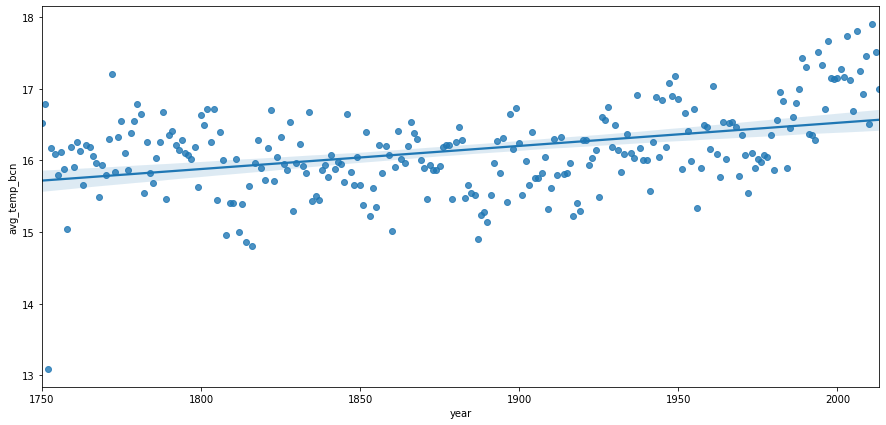

In [44]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_bcn')

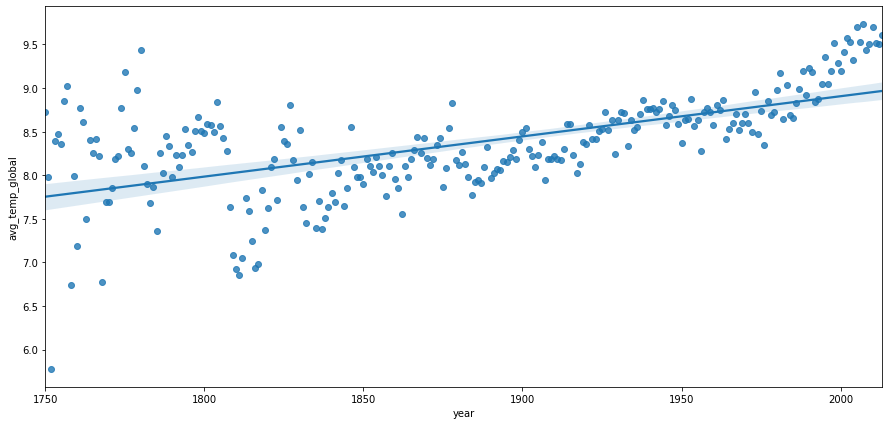

In [45]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_global')

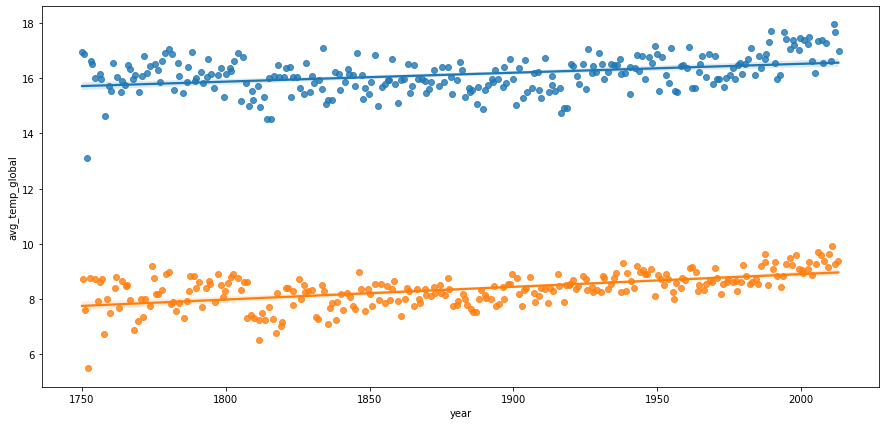

In [41]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_bcn', x_jitter = 0.5, y_jitter = 0.5)
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_global', x_jitter = 0.5, y_jitter = 0.5)

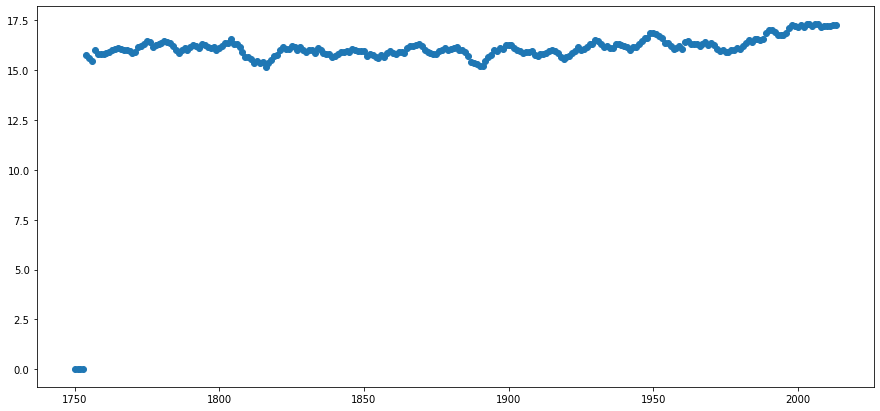

In [119]:
plt.figure(figsize=[15, 7])
plt.scatter(data=df_final, x='year', y='5_year_MA_bcn')

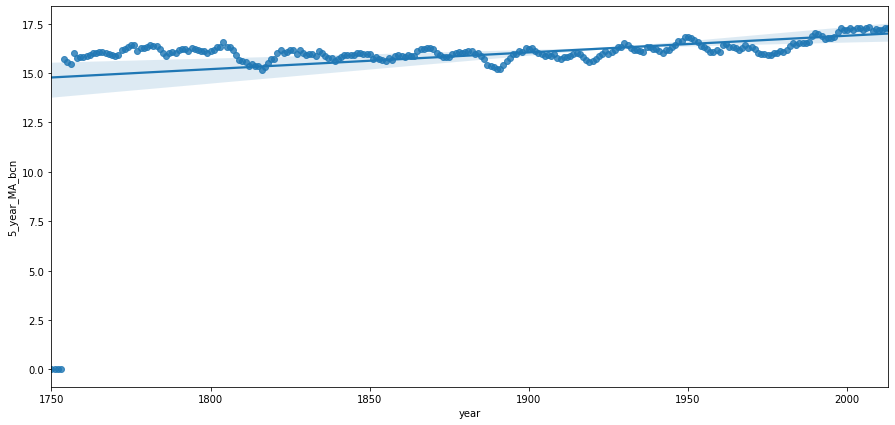

In [120]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = '5_year_MA_bcn')

In [50]:
df_final.describe()

,year,avg_temp_bcn,avg_temp_global,5_year_MA_bcn
count,264.000000,264.000000,264.000000,264.000000
mean,1881.500000,16.141780,8.359394,3.228356
std,76.354437,0.592889,0.575184,0.118578
min,1750.000000,13.090000,5.780000,2.618000
25%,1815.750000,15.830000,8.077500,3.166000
50%,1881.500000,16.095000,8.365000,3.219000
75%,1947.250000,16.470000,8.700000,3.294000
max,2013.000000,17.900000,9.730000,3.580000
